In [1]:
import numpy as np
import matplotlib.pyplot as plt

import symmetric_methods as sm


In [4]:
# MLP structure

L = 4

dim = np.zeros((L+1,))

dim[0] = 7
dim[1] = 6
dim[2] = 5
dim[3] = 6
dim[4] = 7
#dim[5] = 8
#dim[6] = 9
#dim[7] = 10
#dim[8] = 11
#dim[9] = 12

dim= dim.astype(int)


In [25]:
# draw random parameters, test generating the matrix and reverting back to parameters 

wm = np.random.normal(0,1,(L,))
wd = np.random.normal(0,1,(4,L))
wt = np.random.normal(0,1,(2,L-1))
wo = np.random.normal(0,1,((L-2)*(L-1)//2,))

#wt[1,:]=0
#wd = np.zeros((4,L))
#wt = np.zeros((2,L-1))
#wo = np.zeros(((L-2)*(L-1)//2,))

meang = sm.par2mean(L,dim,wm)
covg = sm.par2cov(L,dim,wd,wt,wo)

wmest = sm.mean2par(L,dim,meang)
wdest, wtest, woest = sm.cov2par(L,dim,covg)

meangest = sm.par2mean(L,dim,wmest)
covgest = sm.par2cov(L,dim,wdest,wtest,woest)


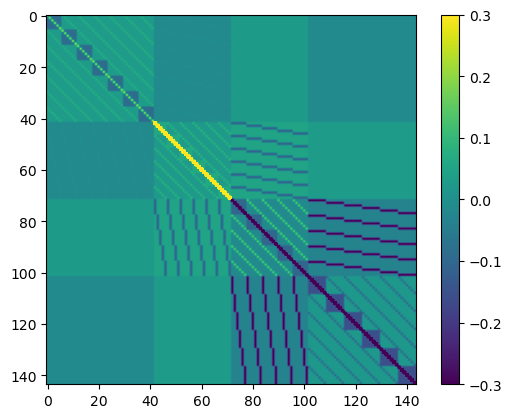

In [21]:
plt.imshow(covg)
plt.clim((-0.3,0.3))
plt.colorbar()
plt.show()


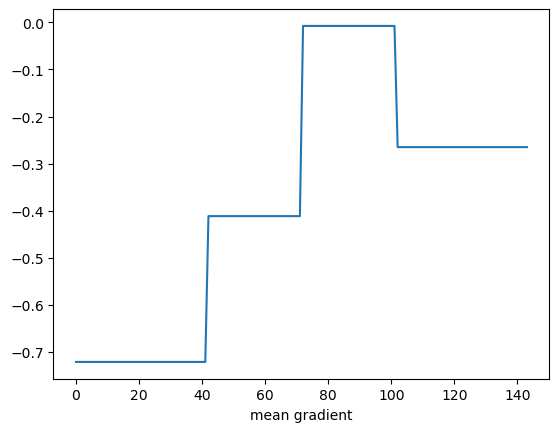

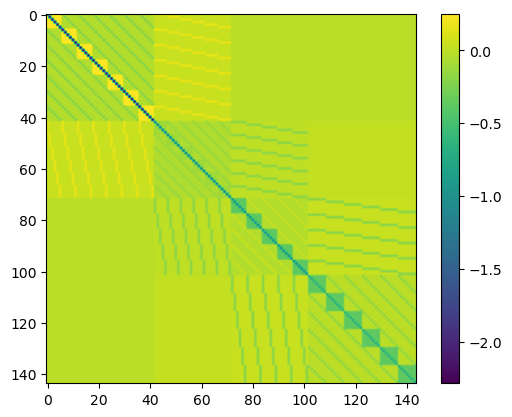

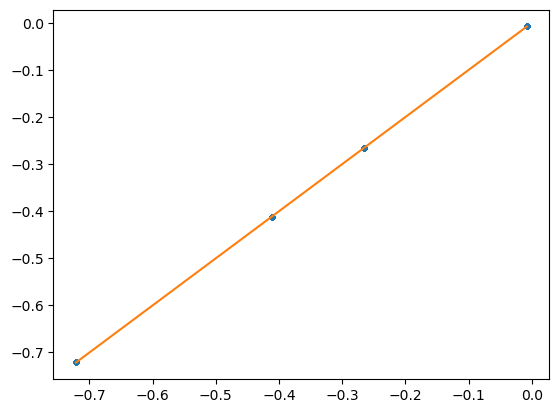

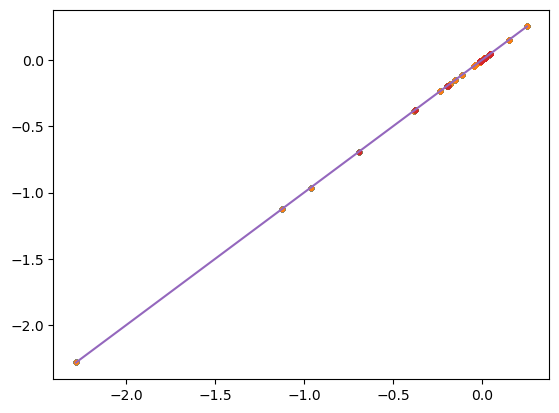

[-0.72132107 -0.41164559 -0.00757495 -0.26506187]
[-0.72132107 -0.41164559 -0.00757495 -0.26506187]
[-2.33642706 -0.90499929 -0.65910691 -0.13040317]
[-2.33642706 -0.90499929 -0.65910691 -0.13040317]
[ 1.74476733 -0.33986999 -2.06717811 -2.55963138]
[ 1.74476733 -0.33986999 -2.06717811 -2.55963138]
[-1.38458943 -0.64457903  0.39907975 -1.1016398 ]
[-1.38458943 -0.64457903  0.39907975 -1.1016398 ]
[-1.61493703 -1.37084974 -1.16948925 -0.46140689]
[-1.61493703 -1.37084974 -1.16948925 -0.46140689]
[ 0.67567279 -1.15778877 -1.40511358]
[ 0.67567279 -1.15778877 -1.40511358]
[1.41317758 0.33227572 1.54617448]
[1.41317758 0.33227572 1.54617448]
[-0.44887218 -0.25940502  0.52446245]
[-0.44887218 -0.25940502  0.52446245]


In [18]:

plt.plot(meang)
plt.xlabel('parameter index')
plt.xlabel('mean gradient')
plt.show()

plt.imshow(covg)
#plt.clim((-0.1,0.1))
plt.colorbar()
plt.show()




plt.plot(meang,meangest,linestyle='none',marker='.')
plt.plot([np.min(meang), np.max(meang)],[np.min(meang), np.max(meang)])
plt.show()

plt.plot(covg,covgest,linestyle='none',marker='.')
plt.plot([np.min(covg), np.max(covg)],[np.min(covg), np.max(covg)])
plt.show()

print(wm)
print(wmest)

for ip in np.arange(0,4):
    print(wd[ip,:])
    print(wdest[ip,:])

for ip in np.arange(0,2):
    print(wt[ip,:])
    print(wtest[ip,:])

print(wo)
print(woest)



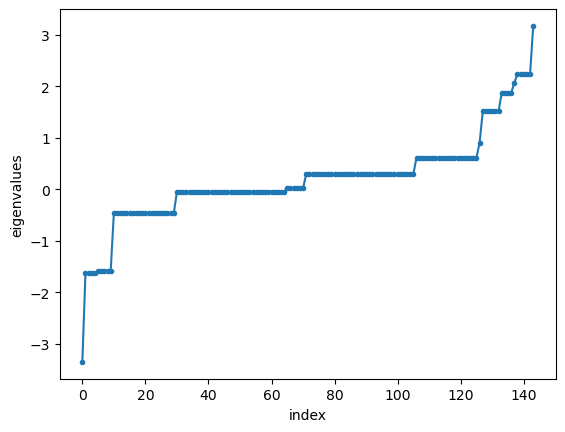

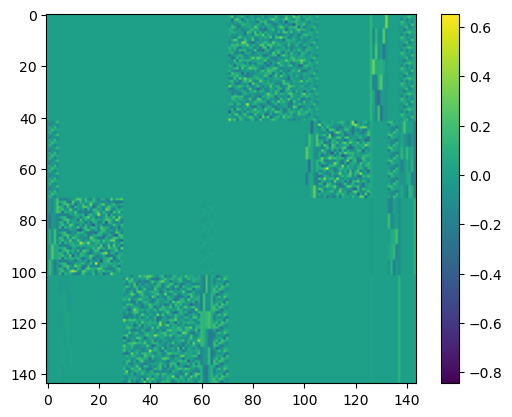

In [27]:
# eigenvalues and eigenvectors of the generated matrix

evl, evc = np.linalg.eigh(covg)

plt.plot(evl,marker='.')
plt.xlabel('index')
plt.ylabel('eigenvalues')
plt.show()

plt.imshow(evc)
plt.colorbar()
plt.show()


In [ ]:

# symmetry group and invariance

npar = 0
cpar = np.zeros((L+1,))
for iL in np.arange(0,L):
    npar = npar + dim[iL] * dim[iL+1]
    cpar[iL+1] = npar

npar = npar.astype(int)
cpar = cpar.astype(int)

G = np.zeros((npar,npar))

rp = np.random.permutation(dim[0])
I = np.eye(dim[0])
P0 = I[rp,:]
for iL in range(L):
    rp = np.random.permutation(dim[iL+1])
    I = np.eye(dim[iL+1])
    P = I[rp,:]
    G[cpar[iL]:cpar[iL+1],cpar[iL]:cpar[iL+1]] = np.kron(P0,P)
    P0 = np.copy(P)
    
plt.imshow(G)
plt.show()

plt.scatter(G @ covg @ G.T , covg)
plt.colorbar()
plt.show()

plt.imshow(evc.T @ G @ evc)
plt.colorbar()
plt.show()


In [45]:

# fit a random matrix

npar = 0
for iL in np.arange(0,L):
    npar = npar + dim[iL] * dim[iL+1]
npar = npar.astype(int)

covgrand = np.random.normal(0,1,(npar,npar))

wd, wt, wo = sm.cov2par(L,dim,covgrand)

covg = sm.par2cov(L,dim,wd,wt,wo)






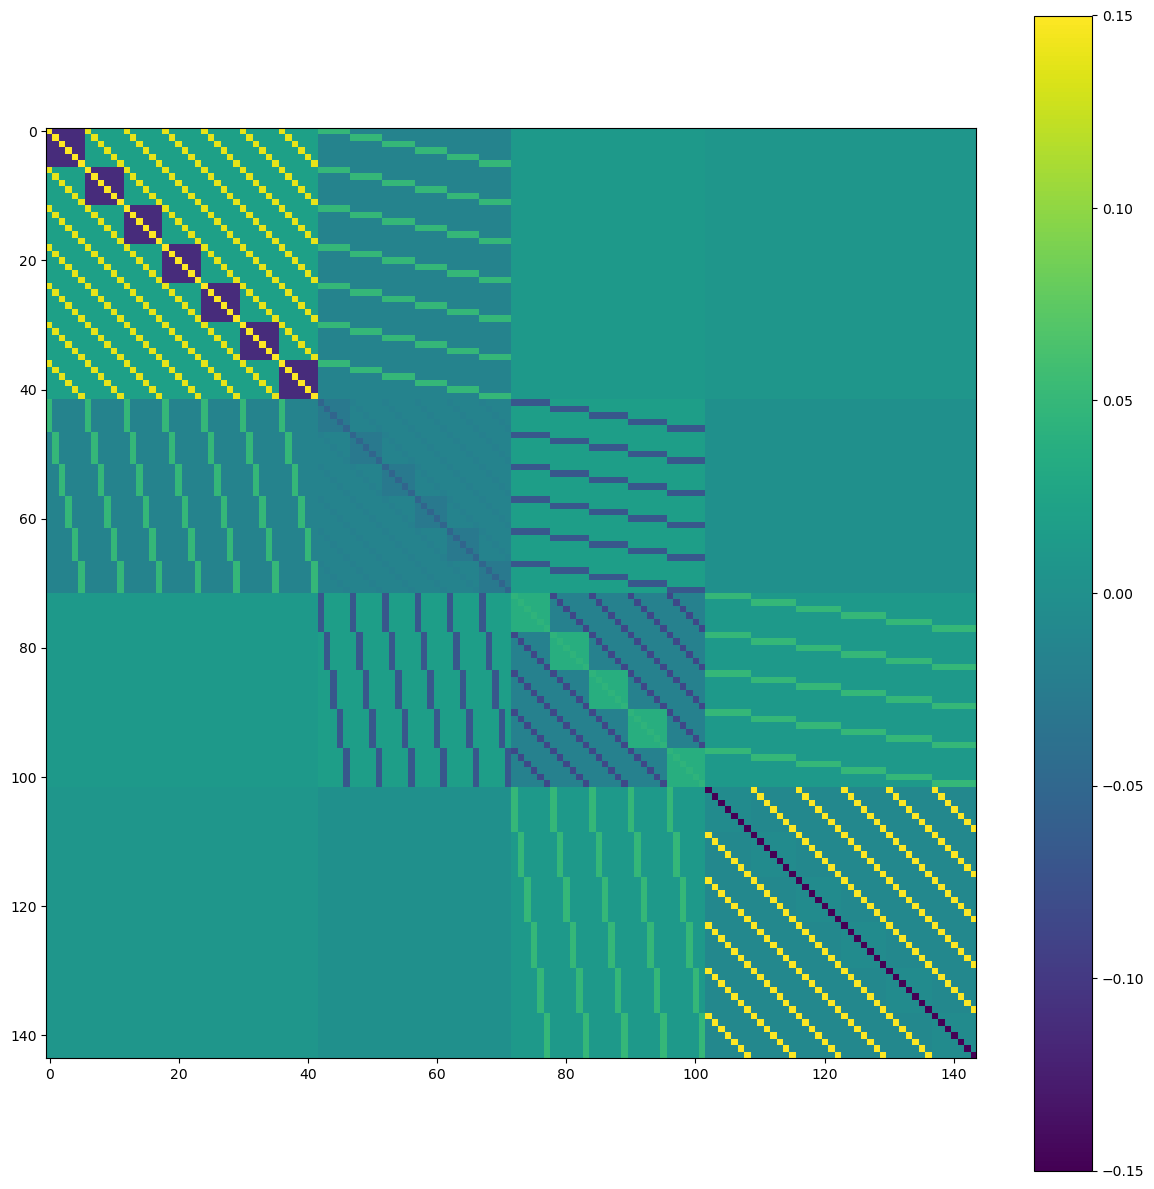

In [46]:

plt.imshow(covg)
plt.clim((-0.15,0.15))
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.colorbar()
plt.show()


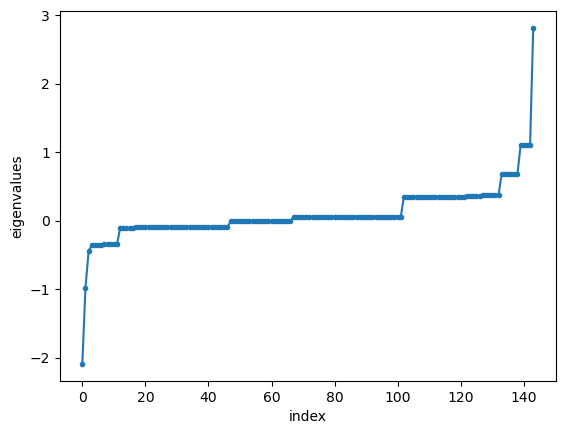

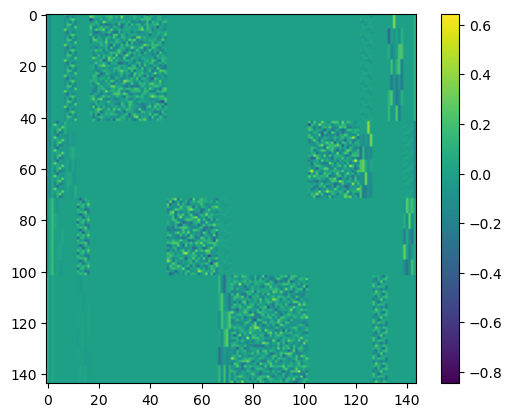

In [35]:
# eigenvalues and eigenvectors of the generated matrix

evl, evc = np.linalg.eigh(covg)

plt.plot(evl,marker='.')
plt.xlabel('index')
plt.ylabel('eigenvalues')
plt.show()

plt.imshow(evc)
plt.colorbar()
plt.show()

In [49]:

print(evl)


[-2.09347334 -0.9800637  -0.44328559 -0.35864719 -0.35864719 -0.35864719
 -0.35864719 -0.3451524  -0.3451524  -0.3451524  -0.3451524  -0.3451524
 -0.11021666 -0.11021666 -0.11021666 -0.11021666 -0.11021666 -0.10043938
 -0.10043938 -0.10043938 -0.10043938 -0.10043938 -0.10043938 -0.10043938
 -0.10043938 -0.10043938 -0.10043938 -0.10043938 -0.10043938 -0.10043938
 -0.10043938 -0.10043938 -0.10043938 -0.10043938 -0.10043938 -0.10043938
 -0.10043938 -0.10043938 -0.10043938 -0.10043938 -0.10043938 -0.10043938
 -0.10043938 -0.10043938 -0.10043938 -0.10043938 -0.10043938 -0.01211498
 -0.01211498 -0.01211498 -0.01211498 -0.01211498 -0.01211498 -0.01211498
 -0.01211498 -0.01211498 -0.01211498 -0.01211498 -0.01211498 -0.01211498
 -0.01211498 -0.01211498 -0.01211498 -0.01211498 -0.01211498 -0.01211498
 -0.01211498  0.05780829  0.05780829  0.05780829  0.05780829  0.05780829
  0.05807009  0.05807009  0.05807009  0.05807009  0.05807009  0.05807009
  0.05807009  0.05807009  0.05807009  0.05807009  0.